# SMS Spam Detection with SVM

Building a spam classifier using Support Vector Machine

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
nltk.download('stopwords', quiet=True)

True

## Loading Data

In [15]:
df = pd.read_csv(r'C:\Users\nihca\OneDrive\Documents\vscode\CodSoft\spam.csv', encoding='latin-1')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (5572, 5)

First few rows:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [16]:
df = df[['v1', 'v2']].copy()
df.columns = ['label', 'message']

print("Label distribution:")
print(df['label'].value_counts())

Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


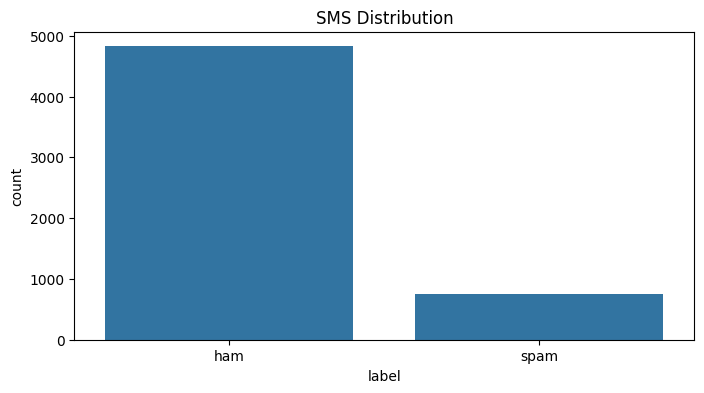

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='label')
plt.title('SMS Distribution')
plt.show()

## Text Preprocessing

In [18]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(words)

df['processed_message'] = df['message'].apply(preprocess_text)

print("Original messages vs Processed messages:")
print("=" * 60)
for i in range(5):
    print(f"Original: {df['message'].iloc[i][:100]}...")
    print(f"Processed: {df['processed_message'].iloc[i][:100]}...")
    print("-" * 60)

Original messages vs Processed messages:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a...
Processed: jurong point crazi avail bugi great world buffet cine got amor wat...
------------------------------------------------------------
Original: Ok lar... Joking wif u oni......
Processed: lar joke wif oni...
------------------------------------------------------------
Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr...
Processed: free entri wkli comp win cup final tkt may text receiv entri questionstd txt ratetc appli over...
------------------------------------------------------------
Original: U dun say so early hor... U c already then say......
Processed: dun say earli hor alreadi say...
------------------------------------------------------------
Original: Nah I don't think he goes to usf, he lives around here though...
Processed: nah dont think goe usf live ar

## TF-IDF Vectorization

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', lowercase=True)

X = tfidf_vectorizer.fit_transform(df['processed_message'])
y = df['label']

print(f"Feature matrix shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")

feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nSample feature names: {feature_names[:20]}")

print(f"\nLabel distribution:")
print(y.value_counts())

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nEncoded labels - Ham: 0, Spam: 1")
print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded label distribution: {np.bincount(y_encoded)}")

Feature matrix shape: (5572, 5000)
Number of features: 5000

Sample feature names: ['aah' 'aathilov' 'aathiwher' 'abbey' 'abdomen' 'abeg' 'abel' 'aberdeen'
 'abi' 'abil' 'abiola' 'abj' 'abl' 'abnorm' 'abouta' 'abroad' 'abt' 'abta'
 'aburo' 'abus']

Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Encoded labels - Ham: 0, Spam: 1
Original classes: ['ham' 'spam']
Encoded label distribution: [4825  747]


## Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels distribution: {np.bincount(y_train)}")
print(f"Testing labels distribution: {np.bincount(y_test)}")

train_spam_pct = (y_train.sum() / len(y_train)) * 100
test_spam_pct = (y_test.sum() / len(y_test)) * 100
print(f"\nSpam percentage in training set: {train_spam_pct:.2f}%")
print(f"Spam percentage in testing set: {test_spam_pct:.2f}%")

Training set shape: (4457, 5000)
Testing set shape: (1115, 5000)
Training labels distribution: [3859  598]
Testing labels distribution: [966 149]

Spam percentage in training set: 13.42%
Spam percentage in testing set: 13.36%


## SVM Training

In [21]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"SVM Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

SVM Accuracy: 0.9830

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       0.98      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



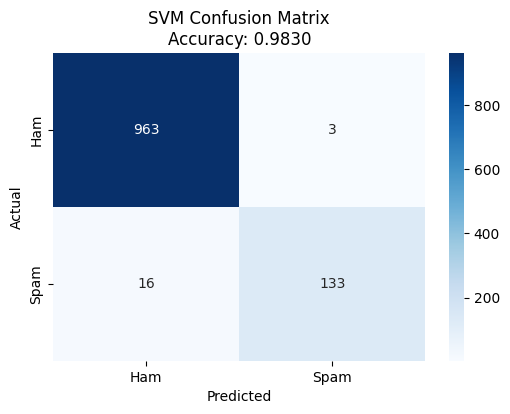

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.title(f'SVM Confusion Matrix\nAccuracy: {accuracy:.4f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()